In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pprint

base = r"D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/Image-processing-fundamentals/assignment-1/";

# Q1

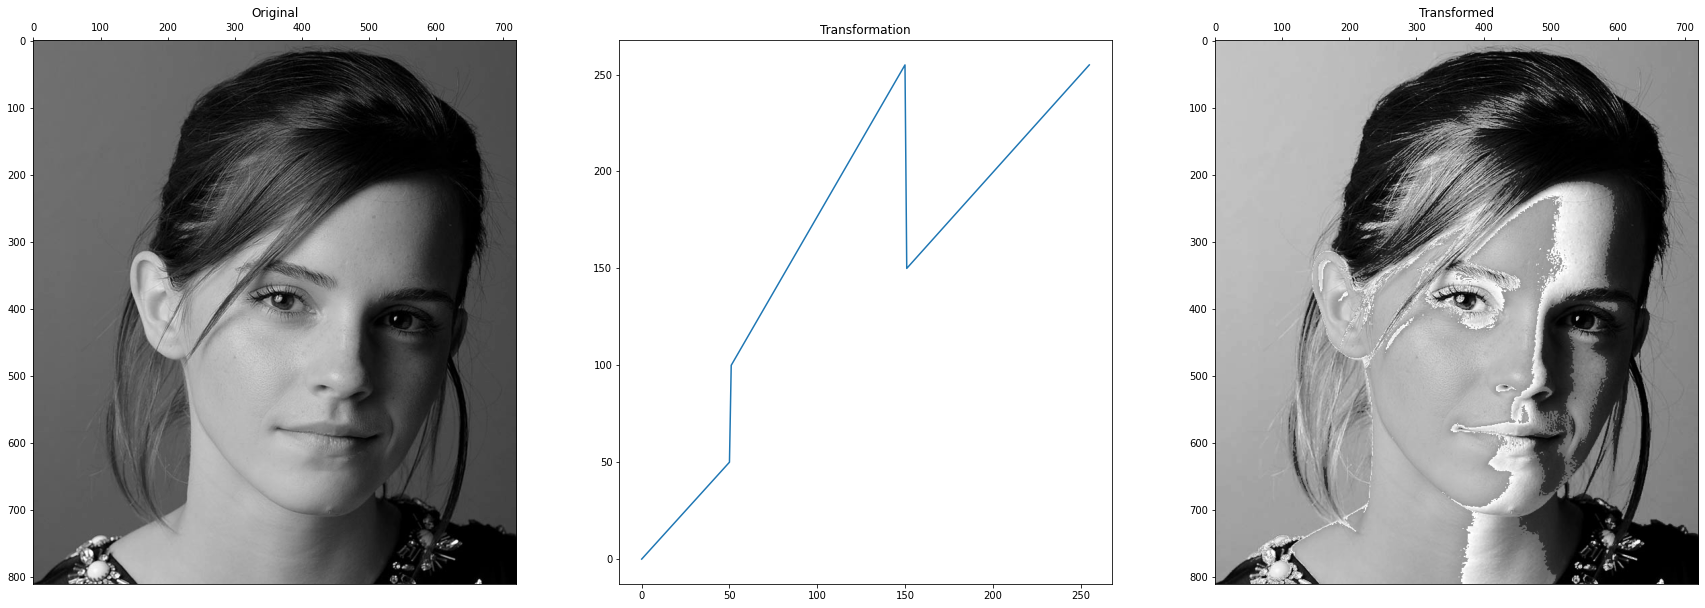

In [2]:
img = cv.imread(base + "emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None;

fig,ax = plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(img,cmap="gray",vmax=255,vmin=0)
ax[0].set_title("Original")
ax[0].xaxis.tick_top();

#making the transformation
t1 = np.linspace(0,50,51);
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,105)

t = np.concatenate((t1,t2,t3),axis=0)
#print(t.shape)

ax[1].plot(t)
ax[1].set_title("Transformation")

transformed_img = cv.LUT(img,t);

ax[2].imshow(transformed_img,cmap="gray",vmax=255,vmin=0)
ax[2].set_title("Transformed")
ax[2].xaxis.tick_top();

# Q2

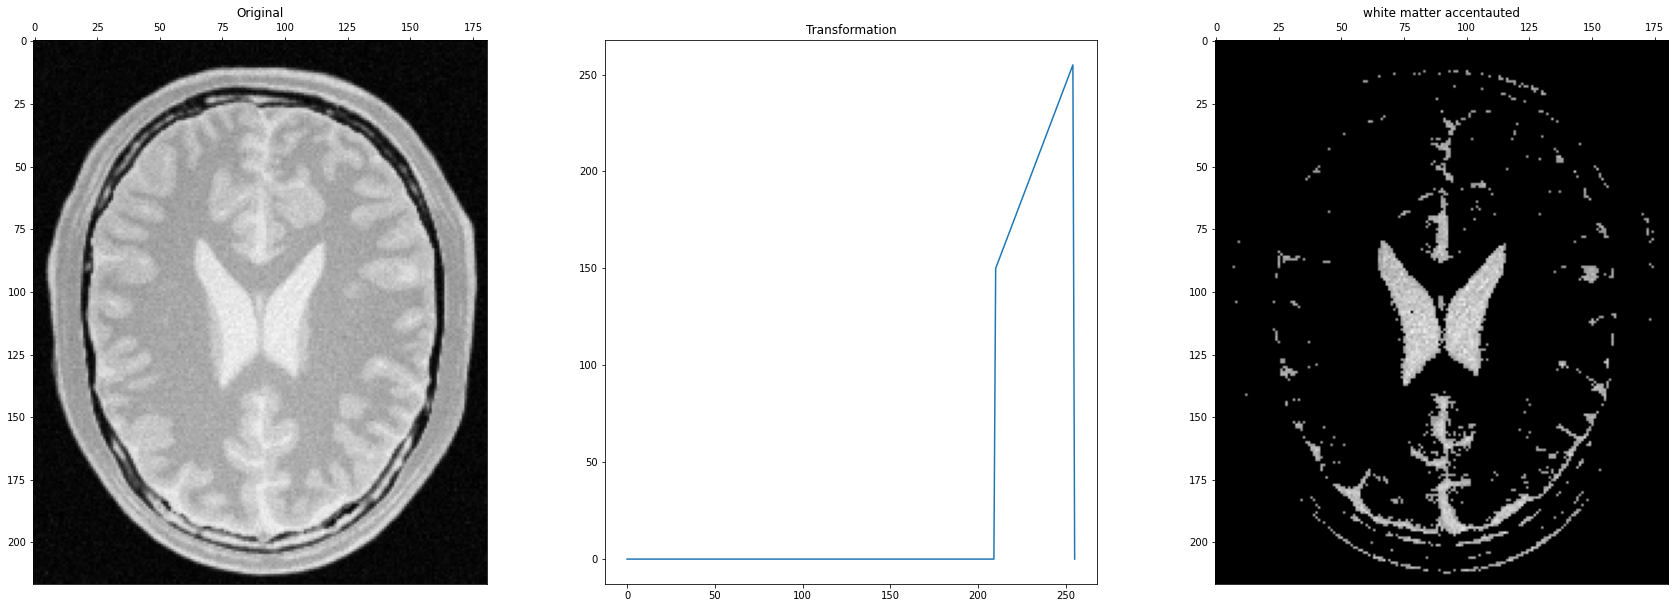

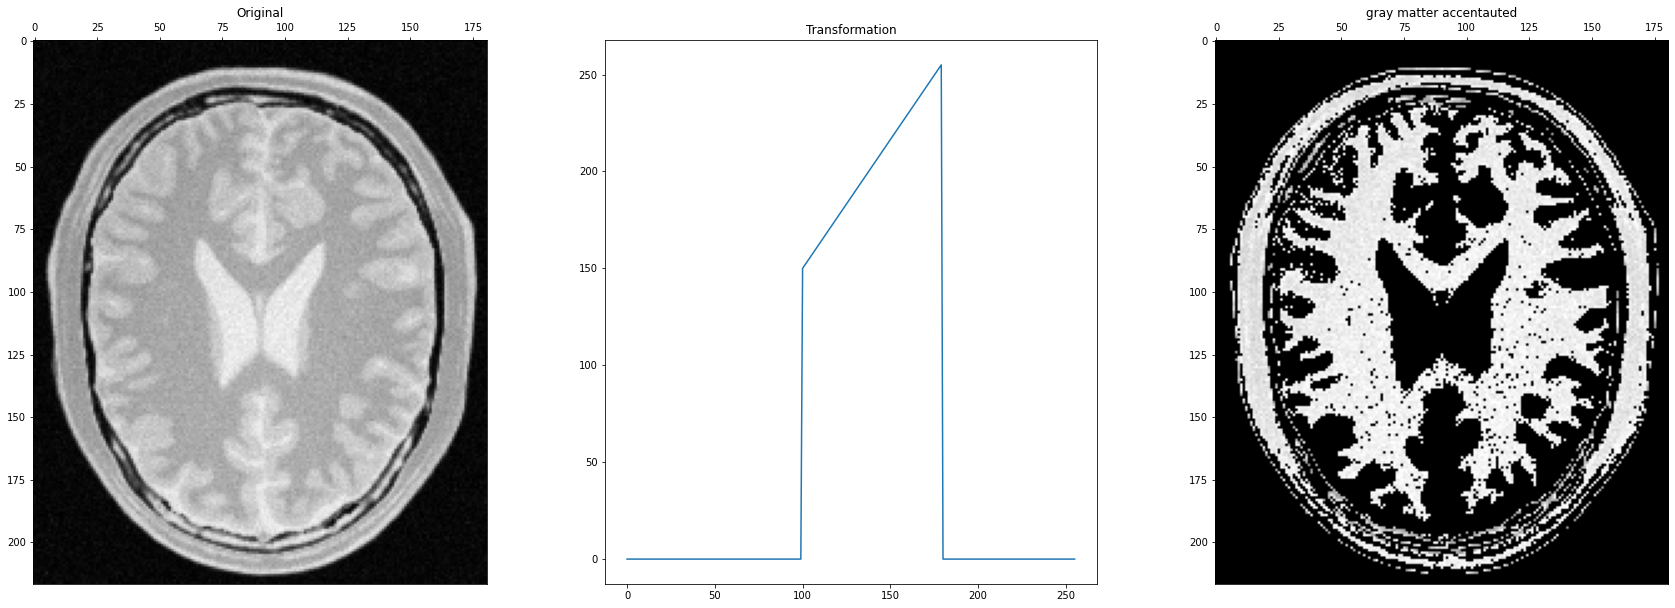

In [3]:
img = cv.imread(base + "brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert img is not None;

fig,ax = plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(img,cmap="gray",vmax=255,vmin=0)
ax[0].set_title("Original")
ax[0].xaxis.tick_top();

#making the transformation
#Lets implement a window with variable starting point and width
i0 = 210
i1=255
w = i1-i0
t1 = np.linspace(0,0,i0)
t2 = np.linspace(150,255,w);
t3 = np.linspace(0,0,256-i0-w)

t = np.concatenate((t1,t2,t3),axis=0)
#print(t.shape)

ax[1].plot(t);
ax[1].set_title("Transformation")

transformed_img = cv.LUT(img,t);

ax[2].imshow(transformed_img,cmap="gray",vmax=255,vmin=0)
ax[2].set_title("white matter accentauted")
ax[2].xaxis.tick_top();

fig,ax = plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(img,cmap="gray",vmax=255,vmin=0)
ax[0].set_title("Original")
ax[0].xaxis.tick_top();

#making the transformation
#Lets implement a window with variable starting point and width
i0 = 100
i1 = 180
w = i1-i0
t1 = np.linspace(0,0,i0)
t2 = np.linspace(150,255,w);
t3 = np.linspace(0,0,256-i0-w)

t = np.concatenate((t1,t2,t3),axis=0)
#print(t.shape)

ax[1].plot(t);
ax[1].set_title("Transformation")

transformed_img = cv.LUT(img,t);

ax[2].imshow(transformed_img,cmap="gray",vmax=255,vmin=0)
ax[2].set_title("gray matter accentauted")
ax[2].xaxis.tick_top();

# Q3

using the gamma value: 0.6


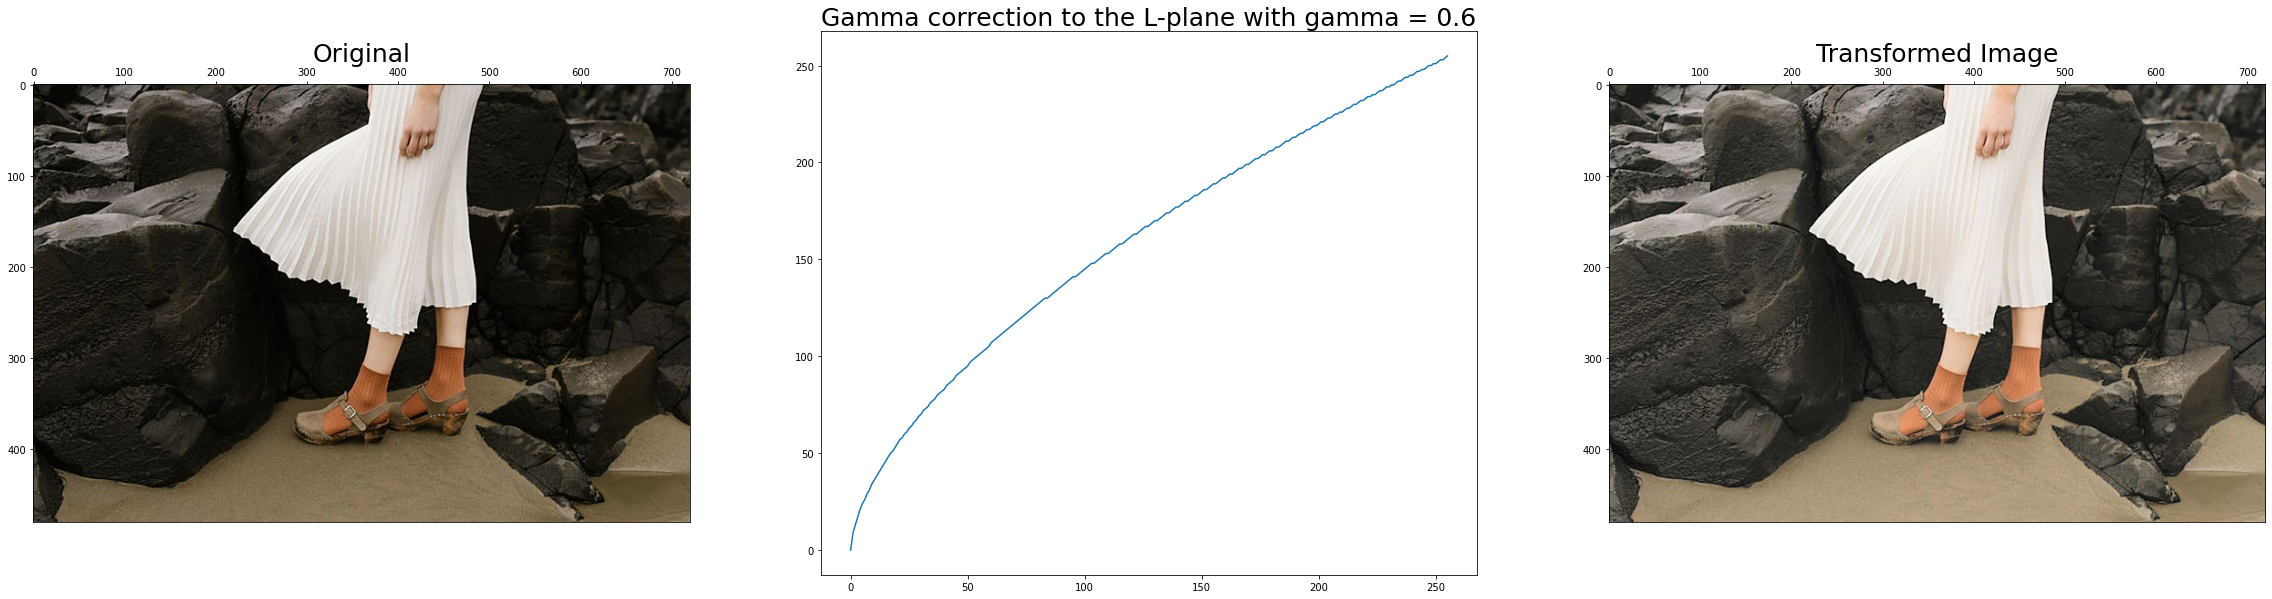

In [4]:
img = cv.imread(base + "highlights_and_shadows.jpg",cv.IMREAD_COLOR)
assert img is not None;
img_RGB = cv.cvtColor(img,cv.COLOR_BGR2RGB);



img_LAB = cv.cvtColor(img,cv.COLOR_BGR2LAB)
L,A,B = cv.split(img_LAB)

gamma = 0.6;
t = np.array([255*(i/255)**gamma for i in range(0,256)]).astype(np.uint8);
L_transformed = cv.LUT(L,t)

transformed_img_LAB = cv.merge((L_transformed,A,B))
transformed_img_RGB = cv.cvtColor(transformed_img_LAB,cv.COLOR_LAB2RGB)


print("using the gamma value:",gamma)

fig,ax = plt.subplots(1,3,figsize=(40,10))
ax[0].imshow(img_RGB)
ax[0].set_title("Original",fontsize=25)
ax[0].xaxis.tick_top();

ax[1].plot(t);
ax[1].set_title("Gamma correction to the L-plane with gamma = " + str(gamma),fontsize=25)

ax[2].imshow(transformed_img_RGB)
ax[2].set_title("Transformed Image",fontsize=25)
ax[2].xaxis.tick_top();






Showing the histograms for original and transformed images (after converting both to grayscale)


Text(0.5, 1.0, 'Transformed image - Histogram')

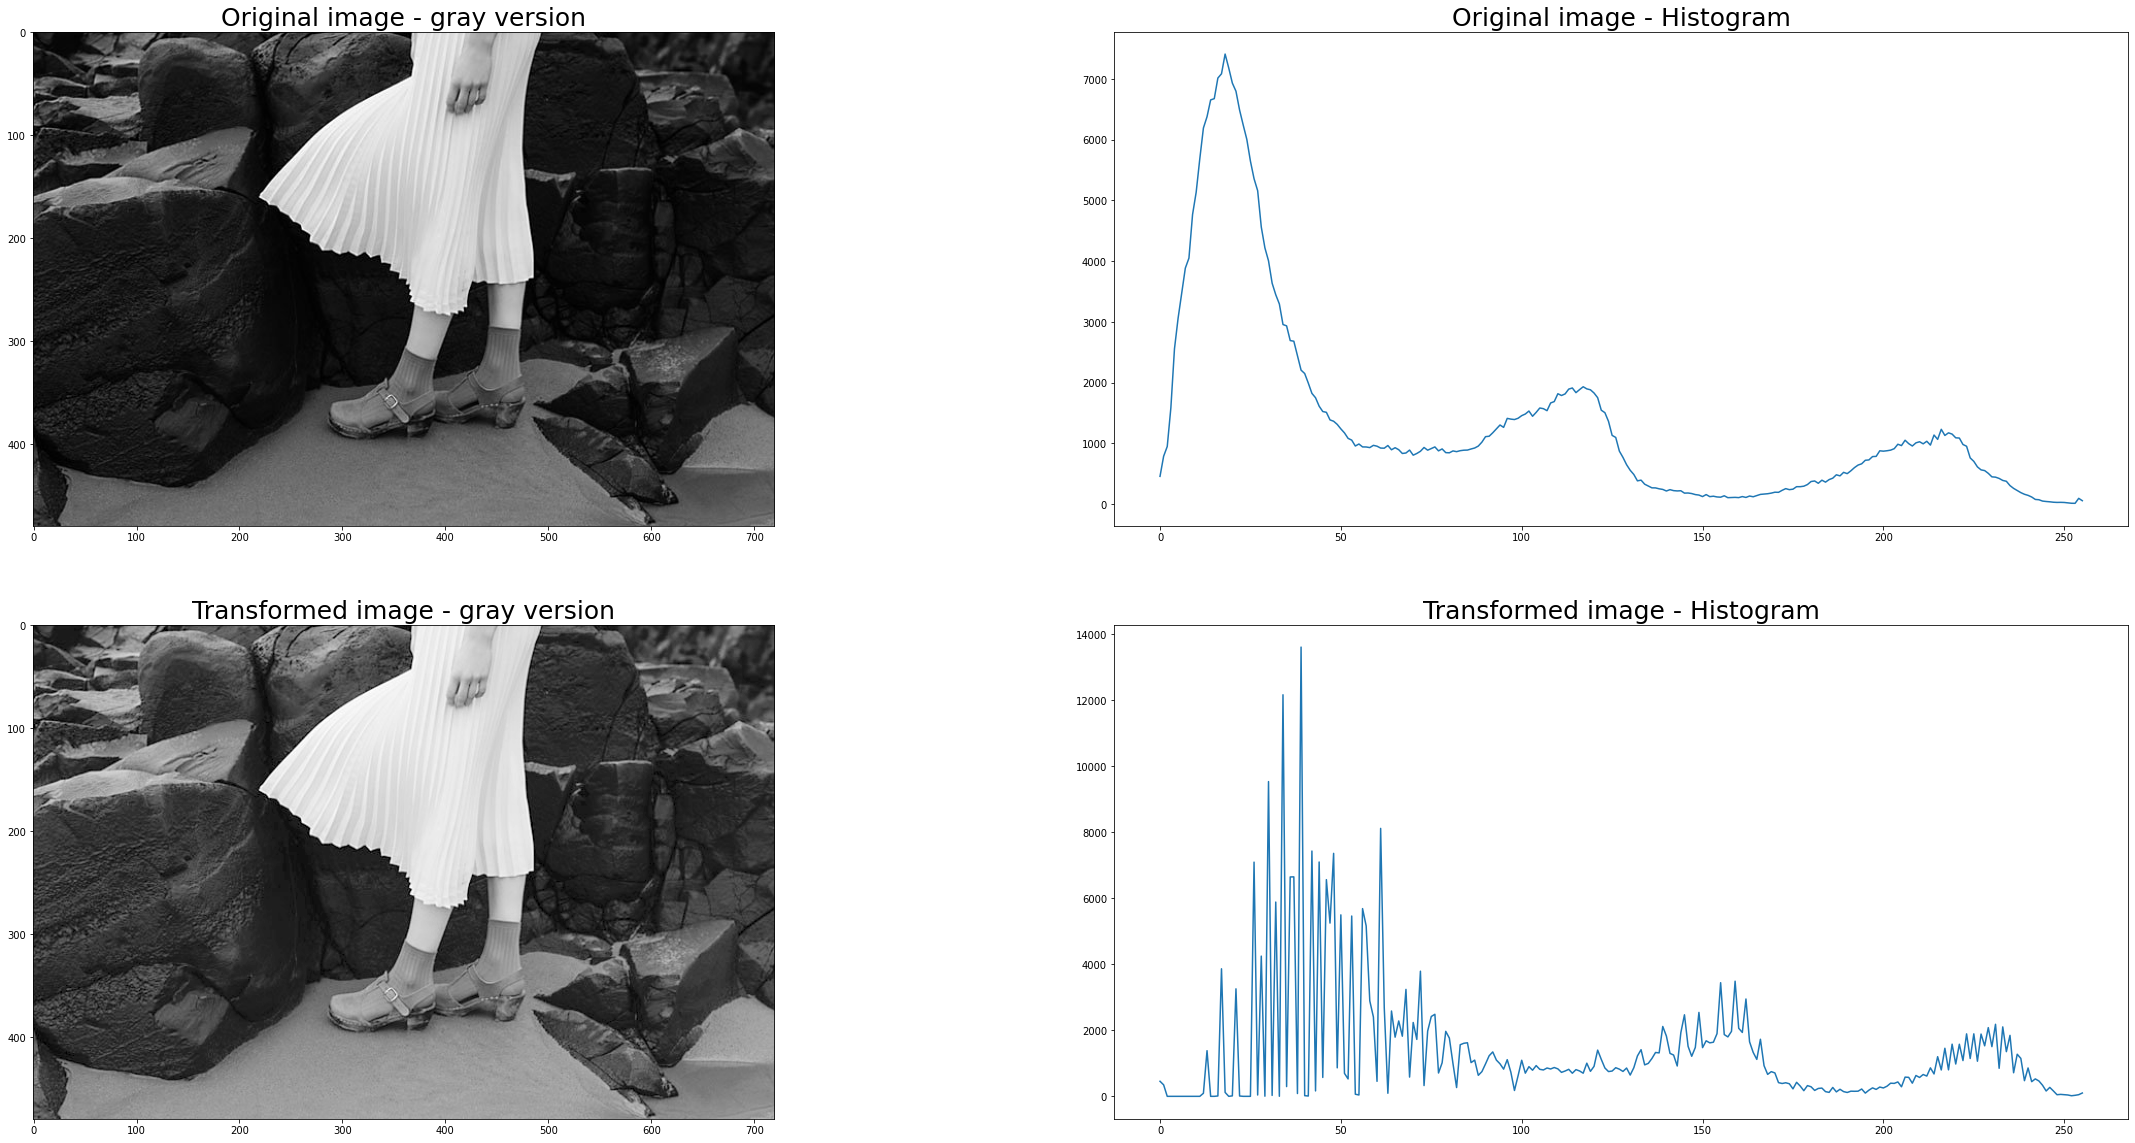

In [5]:
#Histograms
print("Showing the histograms for original and transformed images (after converting both to grayscale)")
gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray_img_transformed = cv.cvtColor(transformed_img_RGB,cv.COLOR_RGB2GRAY)

gray_img_hist = cv.calcHist([gray_img],[0],None,[256],[0,256]);
gray_img_transformed_hist = cv.calcHist([gray_img_transformed],[0],None,[256],[0,256]);

fig,ax = plt.subplots(2,2,figsize=(40,20))
ax[0,0].imshow(gray_img,cmap="gray",vmax=255,vmin=0);
ax[0,0].set_title("Original image - gray version",fontsize=25)
ax[0,1].plot(gray_img_hist)
ax[0,1].set_title("Original image - Histogram",fontsize=25)
ax[1,0].imshow(gray_img_transformed,cmap="gray",vmax=255,vmin=0);
ax[1,0].set_title("Transformed image - gray version",fontsize=25)
ax[1,1].plot(gray_img_transformed_hist)
ax[1,1].set_title("Transformed image - Histogram",fontsize=25)


# Q4

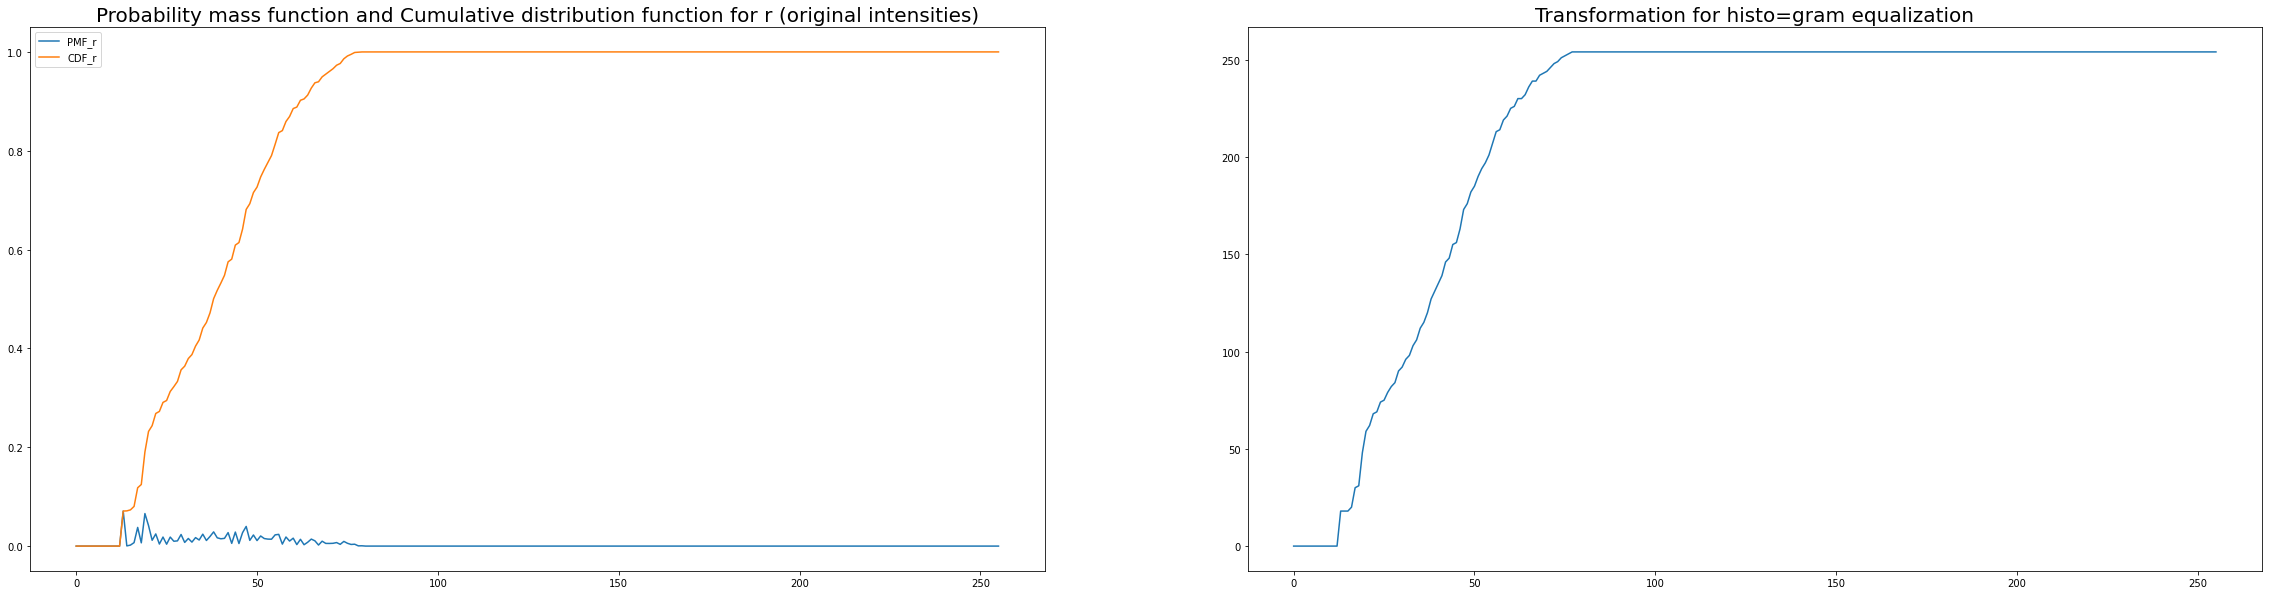

In [6]:
img = cv.imread(base + "shells.png",cv.IMREAD_GRAYSCALE)
assert img is not None;

hist_original = cv.calcHist([img],[0],None,[256],[0,256]);
total_pixels = img.shape[0] * img.shape[1];
P_r = hist_original.astype(np.float32) / total_pixels;

fig,ax = plt.subplots(1,2,figsize=(40,10));
ax[0].plot(P_r,label="PMF_r");
#calculating the CDF_r
CDF_r = np.zeros(P_r.shape[0],dtype=np.float32)
for r in range(P_r.shape[0]):
    if r:
        CDF_r[r] = CDF_r[r-1] + P_r[r];
    else:
        CDF_r[r] = P_r[r];
ax[0].plot(CDF_r,label="CDF_r")
ax[0].legend();
ax[0].set_title("Probability mass function and Cumulative distribution function for r (original intensities)",
               fontsize=20)

#generating the transformation to equalize the histogram
L =256
t = np.array(CDF_r * (L-1)).astype(np.uint8)
ax[1].plot(t)
ax[1].set_title("Transformation for histo=gram equalization",
               fontsize=20)

plt.show();


Text(0.5, 1.0, 'Histogram of histogram equalized image')

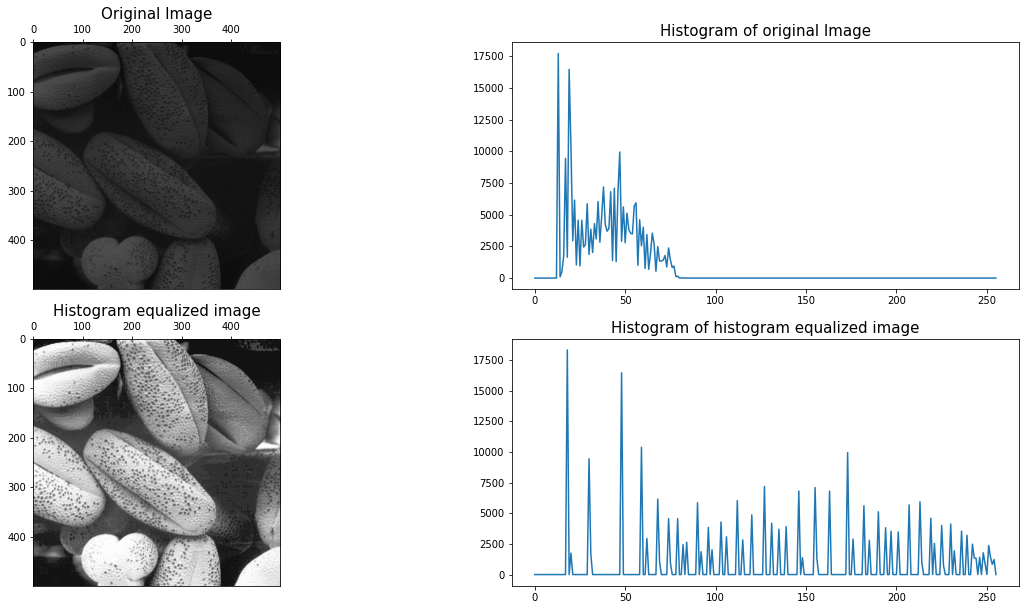

In [7]:
hist_EQ_img = cv.LUT(img,t)
histOf_hist_EQ_img = cv.calcHist([hist_EQ_img],[0],None,[256],[0,256])

fig, ax = plt.subplots(2,2,figsize=(20,10))

ax[0,0].imshow(img,cmap = "gray",vmax=255,vmin=0)
ax[0,0].set_title("Original Image",fontsize=15)
ax[0,0].xaxis.tick_top()
ax[0,1].plot(hist_original)
ax[0,1].set_title("Histogram of original Image",fontsize=15)
ax[1,0].imshow(hist_EQ_img,cmap = "gray",vmax=255,vmin=0)
ax[1,0].set_title("Histogram equalized image",fontsize=15)
ax[1,0].xaxis.tick_top()
ax[1,1].plot(histOf_hist_EQ_img)
ax[1,1].set_title("Histogram of histogram equalized image",fontsize=15)


# Q5

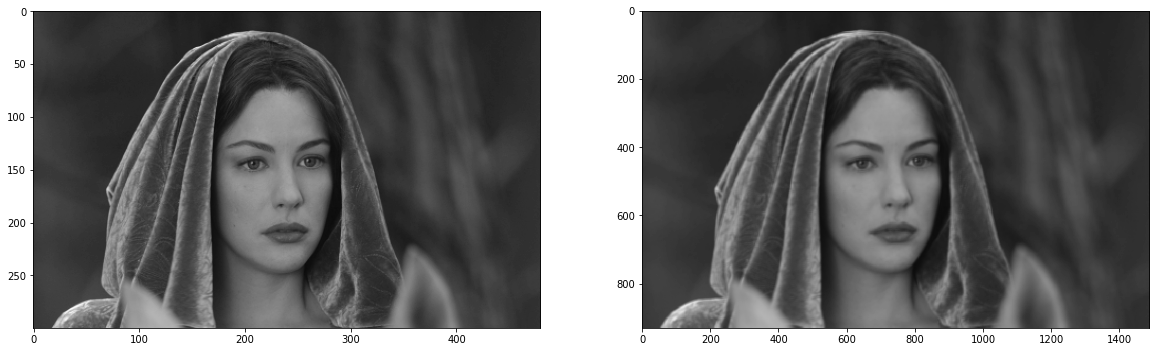

In [8]:
img = cv.imread("D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/Image-processing-fundamentals/assignment-1/a1q5images/im02small.png",cv.IMREAD_GRAYSCALE)
assert img is not None

def zoomNN(src,scalar):
    h0 = src.shape[0]
    w0 = src.shape[1]
    h1 = int(h0 * scalar)
    w1 = int(w0 * scalar)
    zoomedImg = np.zeros((h1,w1),dtype=np.uint8)
    for y in range(h1):
        for x in range(w1):
            y0 = int(min(y // scalar + int(y%scalar >= 0.5),
                     h0-1));
            x0 = int(min(x // scalar + int(x%scalar >= 0.5),
                     w0-1));
            zoomedImg[y,x] = img[y0,x0]
    return zoomedImg


def zoomBI(src,scalar):
    h0 = src.shape[0]
    w0 = src.shape[1]
    h1 = int(h0 * scalar)
    w1 = int(w0 * scalar)
    zoomedImg = np.zeros((h1,w1),dtype=np.uint8)
    for y in range(h1):
        for x in range(w1):
            #floats
            y0 = (y / scalar);
            x0 = (x / scalar);
            y_frac = y0 %1
            x_frac = x0 %1
            
            
            y00 = int(y0)
            x00 = int(x0)
            y01 = min(h0-1,y00+1)
            x01 = min(w0-1,x00+1)
            
            intensity_x_0 = src[y00,x00]*y_frac + src[y01,x00]*(1-y_frac)
            intensity_x_1 = src[y00,x01]*y_frac + src[y01,x01]*(1-y_frac)
            
            intensity = intensity_x_0 * x_frac  + intensity_x_1 * (1-x_frac)
            intensity = int(intensity)
            
            zoomedImg[y,x] = intensity
    return zoomedImg 



zoomedImg = zoomBI(img,3.1);
#visualize the result
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img,cmap="gray",vmax=255,vmin=0)
ax[1].imshow(zoomedImg,cmap="gray",vmax=255,vmin=0)




In [9]:
smallImages = ["im01small.png","im02small.png","im03.png"];
zoomedImages = ["im01.png","im02.png","im03.png"];
for i in range(3):
    imgS = cv.imread("D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/Image-processing-fundamentals/assignment-1/a1q5images/"+smallImages[i] ,cv.IMREAD_GRAYSCALE)
    imgZ = cv.imread("D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/Image-processing-fundamentals/assignment-1/a1q5images/"+zoomedImages[i] ,cv.IMREAD_GRAYSCALE)
    zoomed = zoomBI(imgS,4)
    
    
    print("zoomed" , zoomed.shape)
    print(imgZ.shape)
    SSD = np.sum((zoomed - imgZ)**2)/(imgZ.shape[0]*imgZ.shape[1])
    print(SSD)
    
    

zoomed (1080, 1920)
(1080, 1920)
50.87992621527778
zoomed (1200, 1920)
(1200, 1920)
22.15071701388889
zoomed (5836, 9600)
(1459, 2400)


ValueError: operands could not be broadcast together with shapes (5836,9600) (1459,2400) 

# Q6

Text(0.5, 1.0, 'Gradient-X of the image')

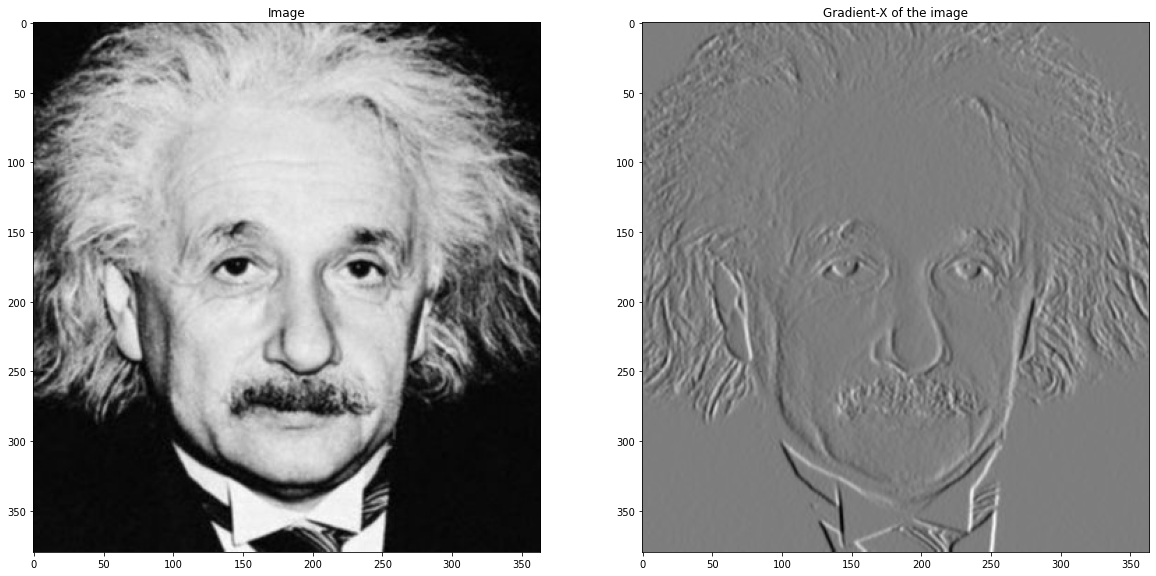

In [29]:
img = cv.imread(base  + "einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32);
assert img is not None;

sobel_h = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]]).astype(np.float32);

img_gradX = cv.filter2D(img,-1,sobel_h)

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img,cmap="gray",vmax=255,vmin=0)
ax[0].set_title("Image")
ax[1].imshow(img_gradX,cmap="gray")
ax[1].set_title("Gradient-X of the image")




Text(0.5, 1.0, 'My own function generated Gradient-X of the image')

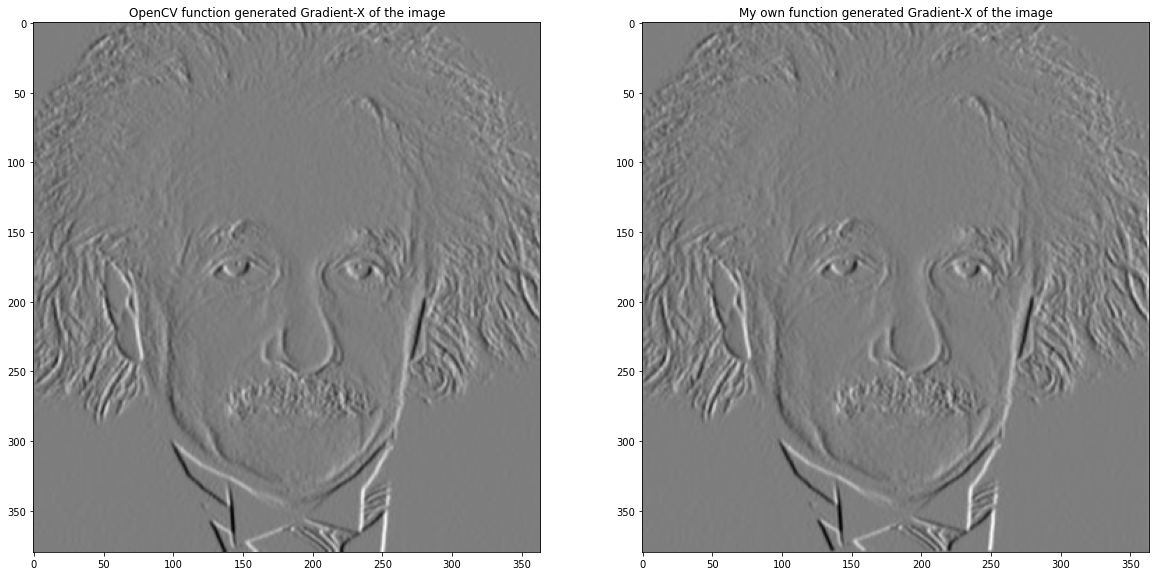

In [43]:
#own code for sobel filtering
res = np.zeros(img.shape,dtype=np.float32)
for y in range(res.shape[0]):
    for x in range(res.shape[1]):
        pixel_mul_kernel_val_sum = 0;
        for k1 in range(3):
            for k2 in range(3):
                kernel_val = sobel_h[k1,k2]
                
                #required pixel in the src image <-- correlattion
                posY = y + k1
                posX = x + k2
                
                #equalent top zero padding
                if (0<=posY<img.shape[0] and 0<=posX<img.shape[1]):
                    pixel_val = img[posY,posX]
                    pixel_mul_kernel_val_sum += kernel_val * pixel_val;
        res[y,x] = pixel_mul_kernel_val_sum
        

                
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img_gradX,cmap="gray")
ax[0].set_title("OpenCV function generated Gradient-X of the image")
ax[1].imshow(res,cmap="gray")
ax[1].set_title("My own function generated Gradient-X of the image")

        
                

Text(0.5, 1.0, 'Filtered image by two seperated 1D  filters')

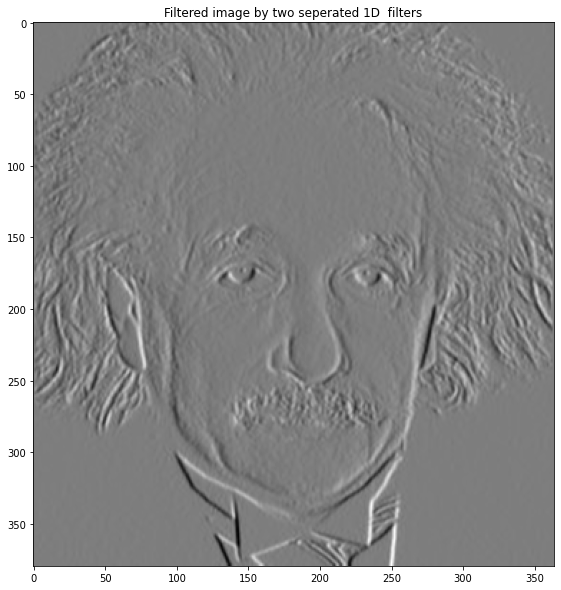

In [42]:
#Filter is seperable --> using the seperability improves performance

kernel_1D_vertical = np.array([1,2,1],dtype=np.float32);
kernel_1D_horizontal = np.array([1,0,-1],dtype=np.float32);

filteredImg  =  cv.sepFilter2D(img,-1,kernel_1D_horizontal,kernel_1D_vertical)
fig, ax = plt.subplots(1,figsize=(10,10))
ax.imshow(filteredImg,cmap="gray")
ax.set_title("Filtered image by two seperated 1D  filters")